In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from read_input import *

%matplotlib inline
sns.set_context("poster")

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Similairty between corpora

In [2]:
data_1_long = pd.read_csv("input/resources/distances_1.tsv", sep="\t", names=["corpus1", "corpus2", "distance"], encoding="utf-8")
data_1_long.loc[:,"corpus1"] = data_1_long.corpus1.apply(lambda x:"_".join(x.split("_")[0:-2]))
data_1_long.loc[:,"corpus2"] = data_1_long.corpus2.apply(lambda x:"_".join(x.split("_")[0:-2]))
data_1 = data_1_long.pivot("corpus2", "corpus1", "distance")
#for i in range(0,len(data_1)):
#    for j in range(0,len(data_1)):
#        if np.isnan(data_1.iloc[i,j]):
#            data_1.iloc[i,j] = data_1.iloc[j,i]

data_2_long = pd.read_csv("input/resources/distances_2.tsv", sep="\t", names=["corpus1", "corpus2", "distance"], encoding="utf-8")
data_2_long.loc[:,"corpus1"] = data_2_long.corpus1.apply(lambda x:"_".join(x.split("_")[0:-2]))
data_2_long.loc[:,"corpus2"] = data_2_long.corpus2.apply(lambda x:"_".join(x.split("_")[0:-2]))
data_2 = data_2_long.pivot("corpus2", "corpus1", "distance")
#for i in range(0,len(data_2)):
#    for j in range(0,len(data_2)):
#        if np.isnan(data_2.iloc[i,j]):
#            data_2.iloc[i,j] = data_2.iloc[j,i]

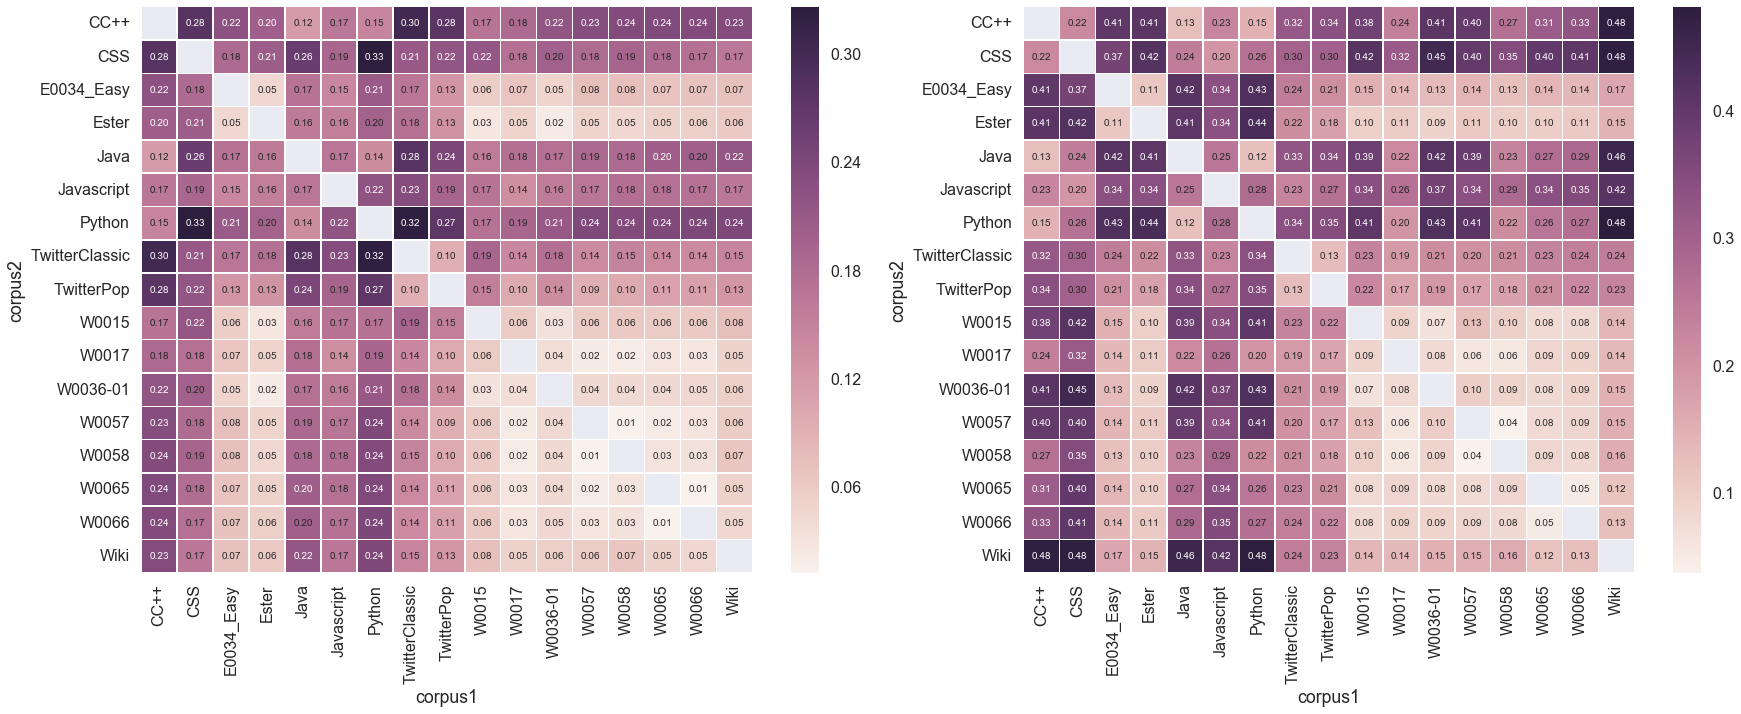

In [19]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(25,10)
sns.heatmap(data_1, annot=True, fmt=".2f", linewidths=.5, ax=ax[0])

sns.heatmap(data_2, annot=True, fmt=".2f", linewidths=.5, ax=ax[1])
fig.tight_layout()
fig.savefig("corpuses_distances_full.pdf", dpi=300)


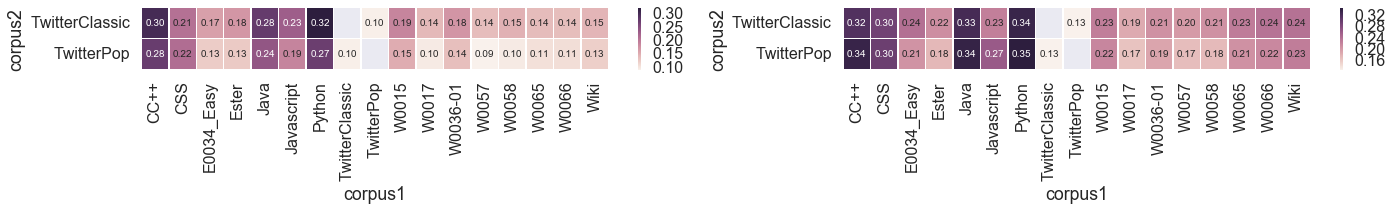

In [29]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,3)
df1 = data_1[data_1.index.str.contains("Twitter")]
sns.heatmap(df1, annot=True, fmt=".2f", linewidths=.5, ax=ax[0])

df2 = data_2[data_2.index.str.contains("Twitter")]
sns.heatmap(df2, annot=True, fmt=".2f", linewidths=.5, ax=ax[1])
fig.tight_layout()
fig.savefig("corpuses_distances_twitter.pdf", dpi=300)


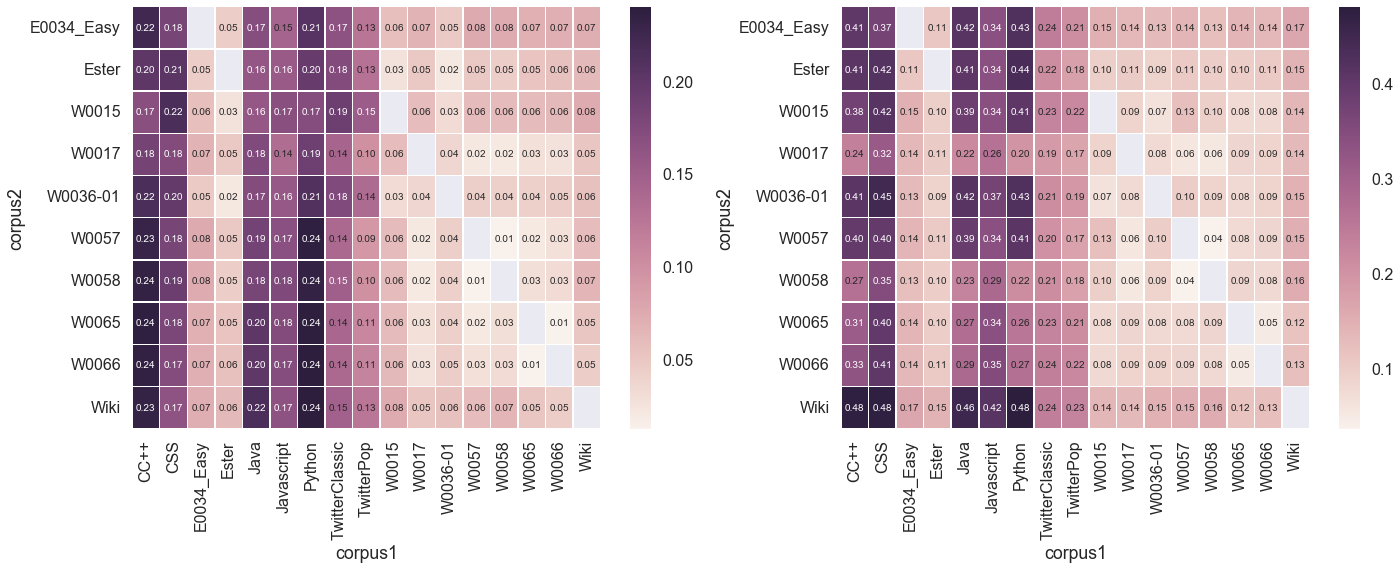

In [22]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
df1 = data_1[(data_1.index.str.contains("W00")) | (data_1.index.str.contains("E00")) | (data_1.index.str.contains("Ester"))
             | (data_1.index.str.contains("Wiki"))]
sns.heatmap(df1, annot=True, fmt=".2f", linewidths=.5, ax=ax[0])

df2 = data_2[(data_2.index.str.contains("W00")) | (data_2.index.str.contains("E00")) | (data_2.index.str.contains("Ester"))
             | (data_2.index.str.contains("Wiki"))]
sns.heatmap(df2, annot=True, fmt=".2f", linewidths=.5, ax=ax[1])
fig.tight_layout()
fig.savefig("corpuses_distances_formal.pdf", dpi=300)

data_1

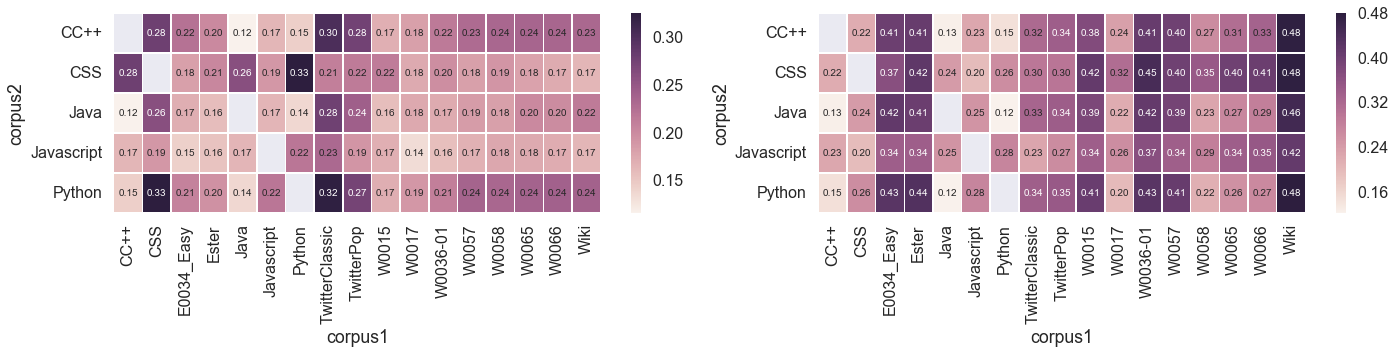

In [28]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,5)
df1 = data_1[(data_1.index.str.contains("Java")) | (data_1.index.str.contains("Python")) | (data_1.index.str.contains("CSS"))
             | (data_1.index.str.contains("CC"))]
sns.heatmap(df1, annot=True, fmt=".2f", linewidths=.5, ax=ax[0])

df2 = data_2[(data_2.index.str.contains("Java")) | (data_2.index.str.contains("Python")) | (data_2.index.str.contains("CSS"))
             | (data_2.index.str.contains("CC"))]
sns.heatmap(df2, annot=True, fmt=".2f", linewidths=.5, ax=ax[1])
fig.tight_layout()
fig.savefig("corpuses_distances_programming.pdf", dpi=300)

In [32]:
code_1 = pd.read_csv("input/resources/Code_all_Avg_freqs_1.tsv", sep=" ", encoding="utf-8", index_col=0, quoting=3)
twitter_1 = pd.read_csv("input/resources/Twitter_all_Avg_freqs_1.tsv", sep=" ", encoding="utf-8", index_col=0, quoting=3)
formal_1 = pd.read_csv("input/resources/Formals_all_Avg_freqs_1.tsv", sep=" ", encoding="utf-8", index_col=0, quoting=3)

code_2 = pd.read_csv("input/resources/Code_all_Avg_freqs_2.tsv", sep=" ", encoding="utf-8", quoting=3, names=["c1", "c2", "frequency"])
twitter_2 = pd.read_csv("input/resources/Twitter_all_Avg_freqs_2.tsv", sep=" ", encoding="utf-8",  quoting=3, names=["c1", "c2", "frequency"])
formal_2 = pd.read_csv("input/resources/Formals_all_Avg_freqs_2.tsv", sep=" ", encoding="utf-8", quoting=3, names=["c1", "c2", "frequency"])

letters = get_letters()
letters = letters + [u"0", u"1", u"2", u"3", u"4", u"5", u"6", u"7", u"8", u"9"] + [c.capitalize() for c in letters]

characters = [x for x in formal_1.index if not x in letters]

In [33]:
#normalize
s = code_1.frequency.sum()
code_1.loc[:,"frequency"] = code_1.frequency.apply(lambda x:x/s)
s = twitter_1.frequency.sum()
twitter_1.loc[:,"frequency"] = twitter_1.frequency.apply(lambda x:x/s)
s = formal_1.frequency.sum()
formal_1.loc[:,"frequency"] = formal_1.frequency.apply(lambda x:x/s)

#remove letter-letter transitions and then normalize
#code_2 = code_2.drop(code_2[(code_2.c1.isin(letters)) & (code_2.c2.isin(letters))].index)
#twitter_2 = twitter_2.drop(twitter_2[(twitter_2.c1.isin(letters)) & (twitter_2.c2.isin(letters))].index)
#formal_2 = formal_2.drop(formal_2[(formal_2.c1.isin(letters)) & (formal_2.c2.isin(letters))].index)

#s = code_2.frequency.sum()
#code_2.loc[:,"frequency"] = code_2.frequency.apply(lambda x:x/s)
#s = twitter_2.frequency.sum()
#twitter_2.loc[:,"frequency"] = twitter_2.frequency.apply(lambda x:x/s)
#s = formal_2.frequency.sum()
#formal_2.loc[:,"frequency"] = formal_2.frequency.apply(lambda x:x/s)



### How prevalent are special characters in text?

In [57]:
perc_special = pd.DataFrame.from_dict({"code": 100-(code_1[code_1.index.isin(letters)].frequency.sum()*100),
              "twitter": 100-(twitter_1[twitter_1.index.isin(letters)].frequency.sum()*100),
              "formal": 100-(formal_1[formal_1.index.isin(letters)].frequency.sum()*100),              
              }, orient="index")
perc_special.columns = ["% special characters"]
perc_special

,% special characters
twitter,10.841513
code,15.095624
formal,6.661527


### Transition from special character to special character (out of all special character bigrams)

In [58]:
c_c = pd.DataFrame.from_dict({"code": code_2[(code_2.c1.isin(characters)) & (code_2.c2.isin(characters))].frequency.sum()*100,
              "twitter": twitter_2[(twitter_2.c1.isin(characters)) & (twitter_2.c2.isin(characters))].frequency.sum()*100,
              "formal": formal_2[(formal_2.c1.isin(characters)) & (formal_2.c2.isin(characters))].frequency.sum(),
              }, orient="index")
c_c.columns = ["% C-C transition"]
c_c

,% C-C transition
twitter,15.297865
code,13.268455
formal,0.049526


### Character-number transitions (out of all special character bigrams)

In [59]:
numbers =  [u"0", u"1", u"2", u"3", u"4", u"5", u"6", u"7", u"8", u"9"]
c_n = pd.DataFrame.from_dict({"code": code_2[((code_2.c1.isin(numbers)) & (code_2.c2.isin(characters))) |
                                             ((code_2.c2.isin(numbers)) & (code_2.c1.isin(characters)))].frequency.sum()*100,
              "twitter": twitter_2[((twitter_2.c1.isin(numbers)) & (twitter_2.c2.isin(characters))) |
                                             ((twitter_2.c2.isin(numbers)) & (twitter_2.c1.isin(characters)))].frequency.sum()*100,
              "formal": formal_2[((formal_2.c1.isin(numbers)) & (formal_2.c2.isin(characters))) |
                                             ((formal_2.c2.isin(numbers)) & (formal_2.c1.isin(characters)))].frequency.sum()*100,
              }, orient="index")
c_n.columns = ["% C-Number transition"]
c_n

,% C-Number transition
twitter,1.636358
code,5.612084
formal,2.912375


###  frequency space-character transitions (out of all special character bigrams)

In [60]:
c_s = pd.DataFrame.from_dict({"code": code_2[((code_2.c1 == "space") & (code_2.c2.isin(characters))) |
                                             ((code_2.c2 == "space") & (code_2.c1.isin(characters)))].frequency.sum()*100,
                              "twitter": twitter_2[((twitter_2.c1 == "space") & (twitter_2.c2.isin(characters))) |
                                             ((twitter_2.c2 == "space") & (twitter_2.c1.isin(characters)))].frequency.sum()*100,
                              "formal": formal_2[((formal_2.c1 == "space") & (formal_2.c2.isin(characters))) |
                                             ((formal_2.c2 == "space") & (formal_2.c1.isin(characters)))].frequency.sum()*100
              }, orient="index")
c_s.columns = ["% C-space transition"]
c_s

,% C-space transition
twitter,22.293306
code,27.774113
formal,28.125844


## Character frequency lists

In [16]:
set_scenario_files("scenario3")
#weighted
f_weighted, f_b = get_probabilities(corpus_weights={"formal":0.8, "code":0.1, "twitter":0.1})
f_weighted = pd.DataFrame.from_dict(f_weighted, orient="index").sort_values(by=0, ascending=False)
f_weighted.columns=["frequency"]
f_weighted = f_weighted[f_weighted.index.isin(get_characters())]

#single
f_formal, f_b = get_probabilities(corpus_weights={"formal":1.0, "code":0.0, "twitter":0.0})
f_formal = pd.DataFrame.from_dict(f_formal, orient="index").sort_values(by=0, ascending=False)
f_formal.columns=["frequency"]
f_formal = f_formal[f_formal.index.isin(get_characters())]

f_twitter, f_b = get_probabilities(corpus_weights={"formal":0.0, "code":0.0, "twitter":1.0})
f_twitter = pd.DataFrame.from_dict(f_twitter, orient="index").sort_values(by=0, ascending=False)
f_twitter.columns=["frequency"]
f_twitter = f_twitter[f_twitter.index.isin(get_characters())]

f_code,f_b  = get_probabilities(corpus_weights={"formal":0.0, "code":1.0, "twitter":0.0})
f_code = pd.DataFrame.from_dict(f_code, orient="index").sort_values(by=0, ascending=False)
f_code.columns=["frequency"]
f_code = f_code[f_code.index.isin(get_characters())]

weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora


In [18]:
f_formal.to_csv("outputs/formal.csv", sep="\t", encoding="utf-8")
f_weighted.to_csv("outputs/weighted.csv", sep="\t", encoding="utf-8")
f_code.to_csv("outputs/code.csv", sep="\t", encoding="utf-8")
f_twitter.to_csv("outputs/twitter.csv", sep="\t", encoding="utf-8")

## Compare letter and (summed up) bigram frequencies

In [37]:
formal_bigram_sum = pd.DataFrame(columns={"frequency"}, index=formal_1.index)
for l in formal_1.index:
    formal_bigram_sum.loc[l] = formal_2[(formal_2.c2==l)].frequency.sum()

In [38]:
formal_1.sort_values(by="frequency", ascending=False)


,frequency
letter,
space,1.575324e-01
e,1.098290e-01
s,6.198991e-02
i,5.786479e-02
a,5.780429e-02
n,5.776271e-02
t,5.511120e-02
r,5.289398e-02
o,4.505160e-02


In [39]:
formal_bigram_sum.sort_values(by="frequency", ascending=False)

,frequency
letter,
space,0.158292
e,0.110491
s,0.0623986
i,0.058306
n,0.0582071
a,0.0581446
t,0.0555247
r,0.0533157
o,0.0453773


In [40]:
formal_2.sort_values(by="frequency", ascending=False)

,c1,c2,frequency
0,e,space,3.741766e-02
1,s,space,2.881617e-02
2,space,d,2.296085e-02
3,e,s,1.997672e-02
4,space,l,1.597421e-02
5,t,space,1.584732e-02
6,o,n,1.542155e-02
7,d,e,1.483123e-02
8,e,n,1.442377e-02
9,l,e,1.302713e-02
